In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [7]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass          0.0 %
fnlwgt             0.0 %
education          0.0 %
educational-num    0.0 %
marital-status     0.0 %
occupation         0.0 %
relationship       0.0 %
race               0.0 %
gender             0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
native-country     0.0 %
income             0.0 %
dtype: object

In [8]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [9]:
# Checking the counts of label categories
income = df['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    76.07 %
>50K     23.93 %
Name: income, dtype: object

## Observations:
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

## Step 2: Exploratory Data Analysis

2.1: Univariate Analysis

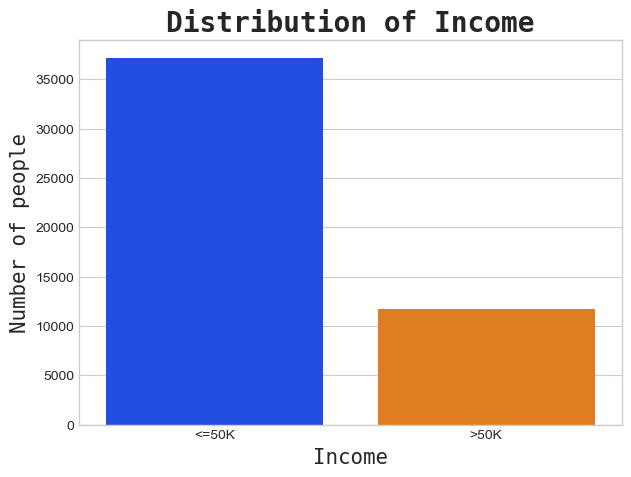

In [10]:
# Creating a barplot for 'Income'
income = df['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

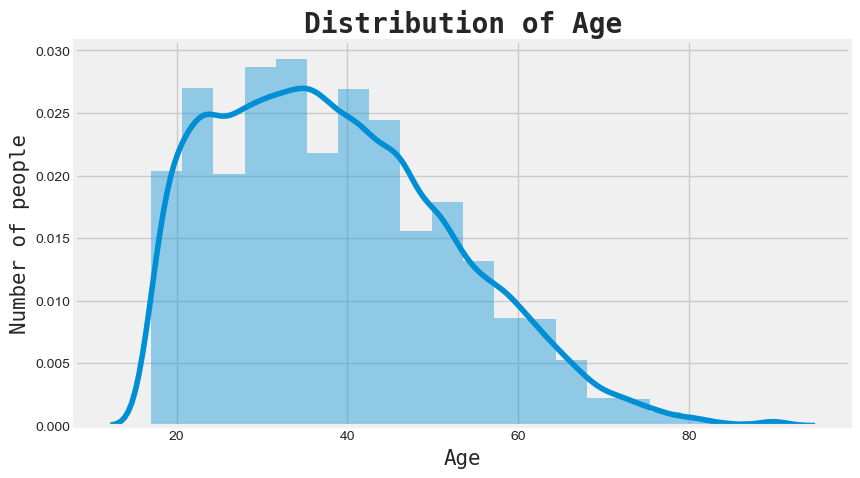

In [11]:
# Creating a distribution plot for 'Age'
age = df['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

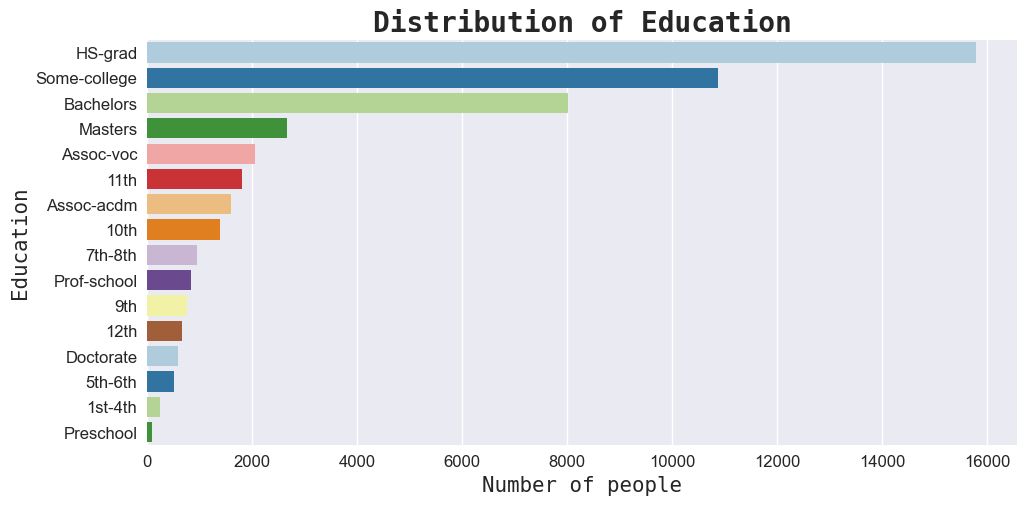

In [12]:
# Creating a barplot for 'Education'
edu = df['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

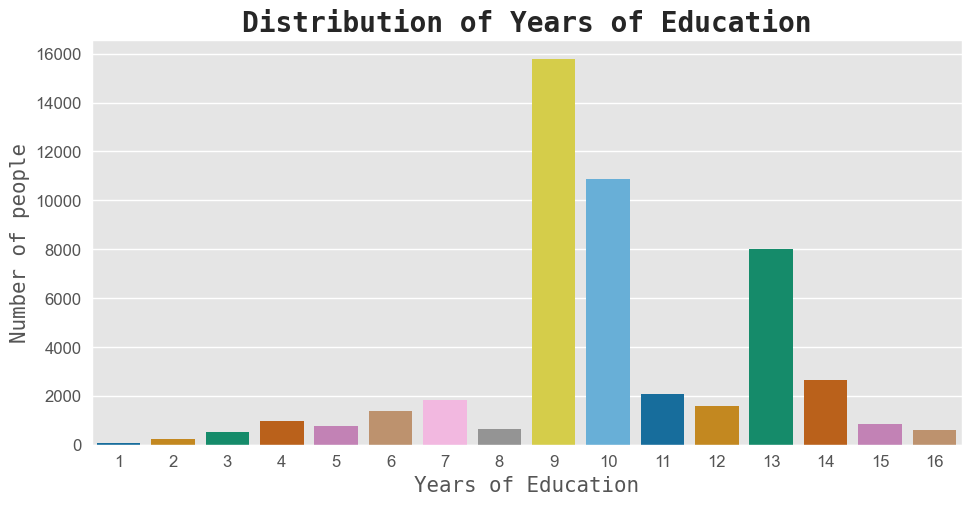

In [13]:
# Creating a barplot for 'Years of Education'
edu_num = df['educational-num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

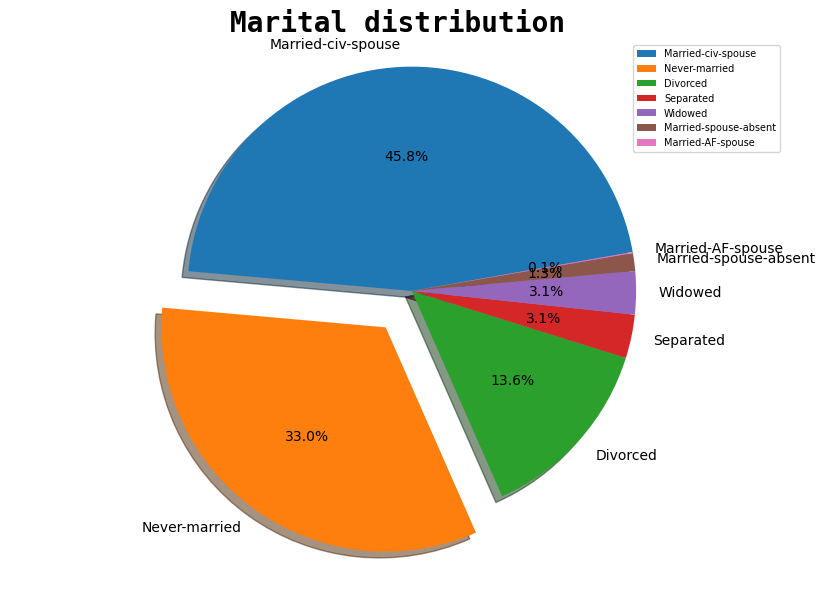

In [14]:
marital = df['marital-status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

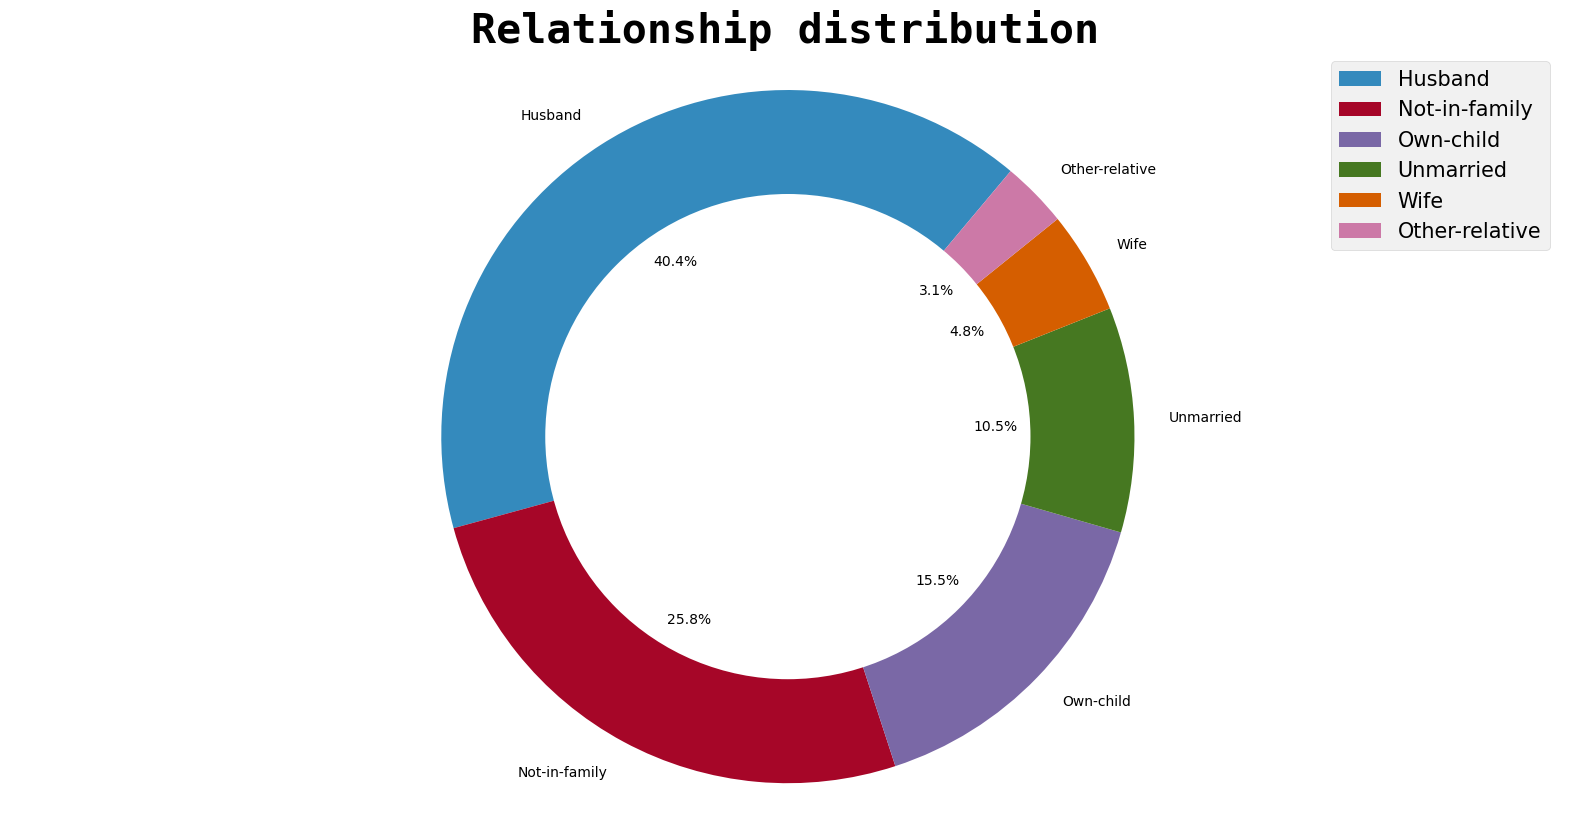

In [15]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

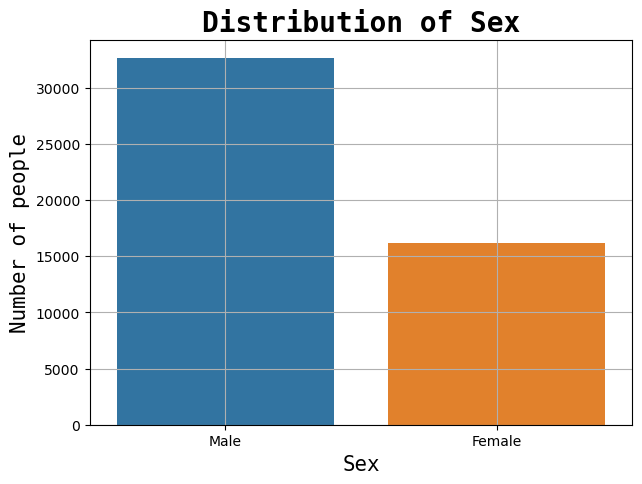

In [16]:
# Creating a barplot for 'Sex'
sex = df['gender'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [19]:
pip install squarify

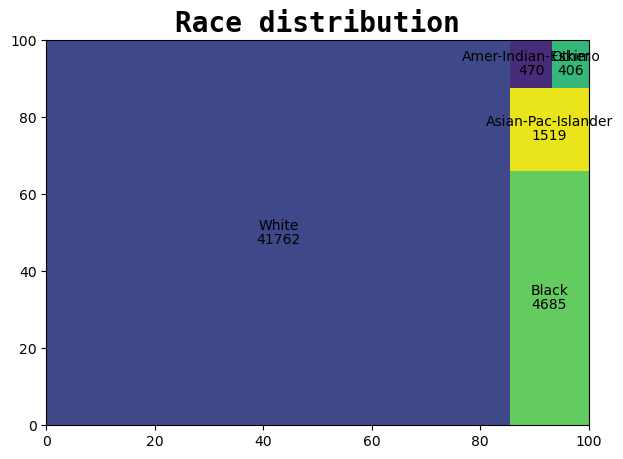

In [21]:
# Creating a Treemap for 'Race'
import squarify
race = df['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

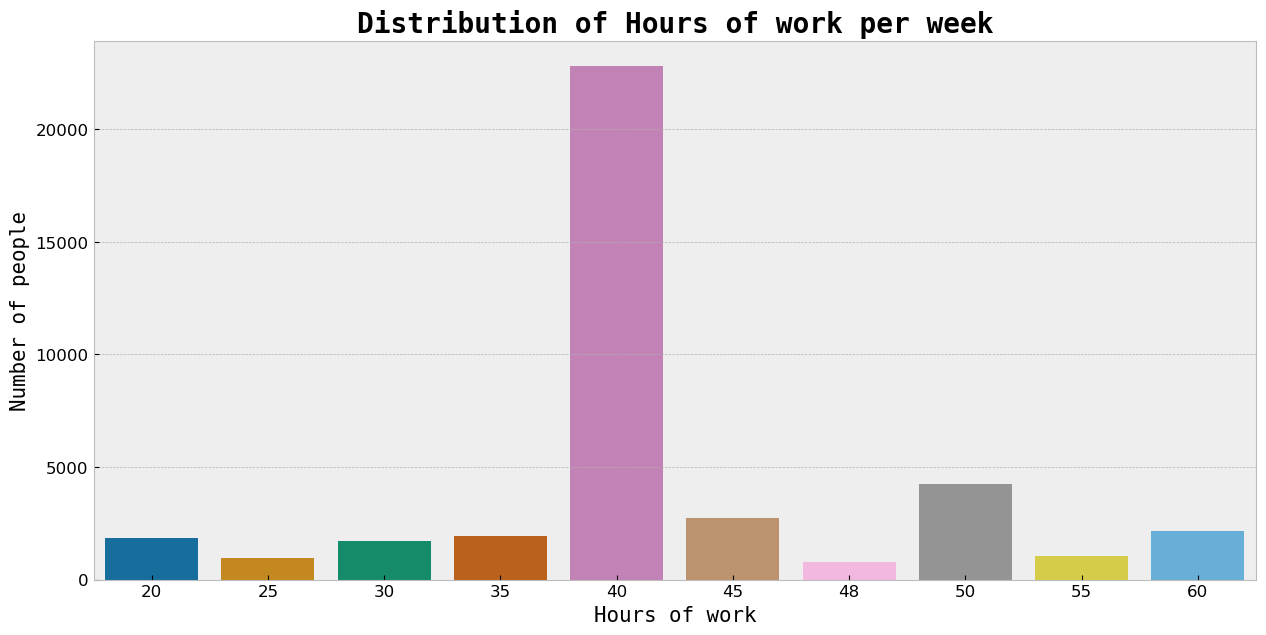

In [22]:
# Creating a barplot for 'Hours per week'
hours = df['hours-per-week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

2.2 Bivariate Analysis

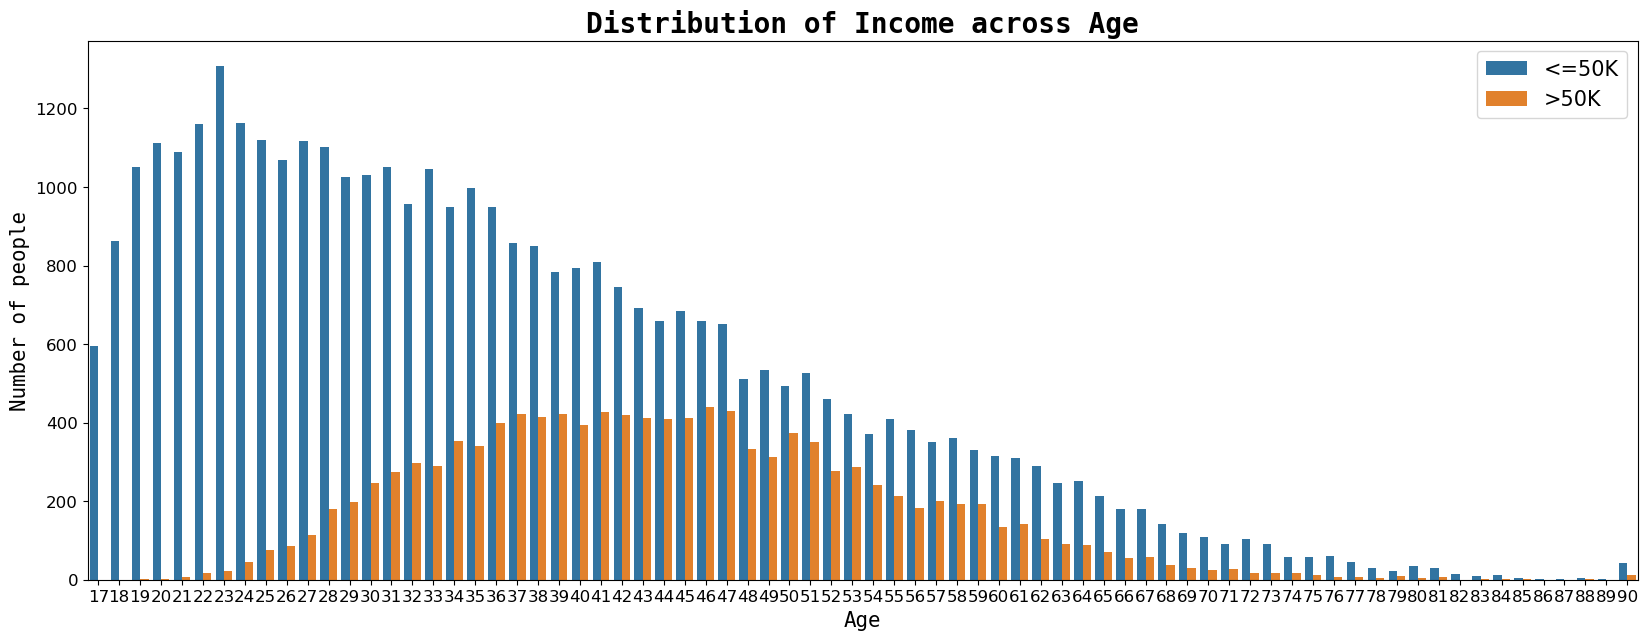

In [23]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

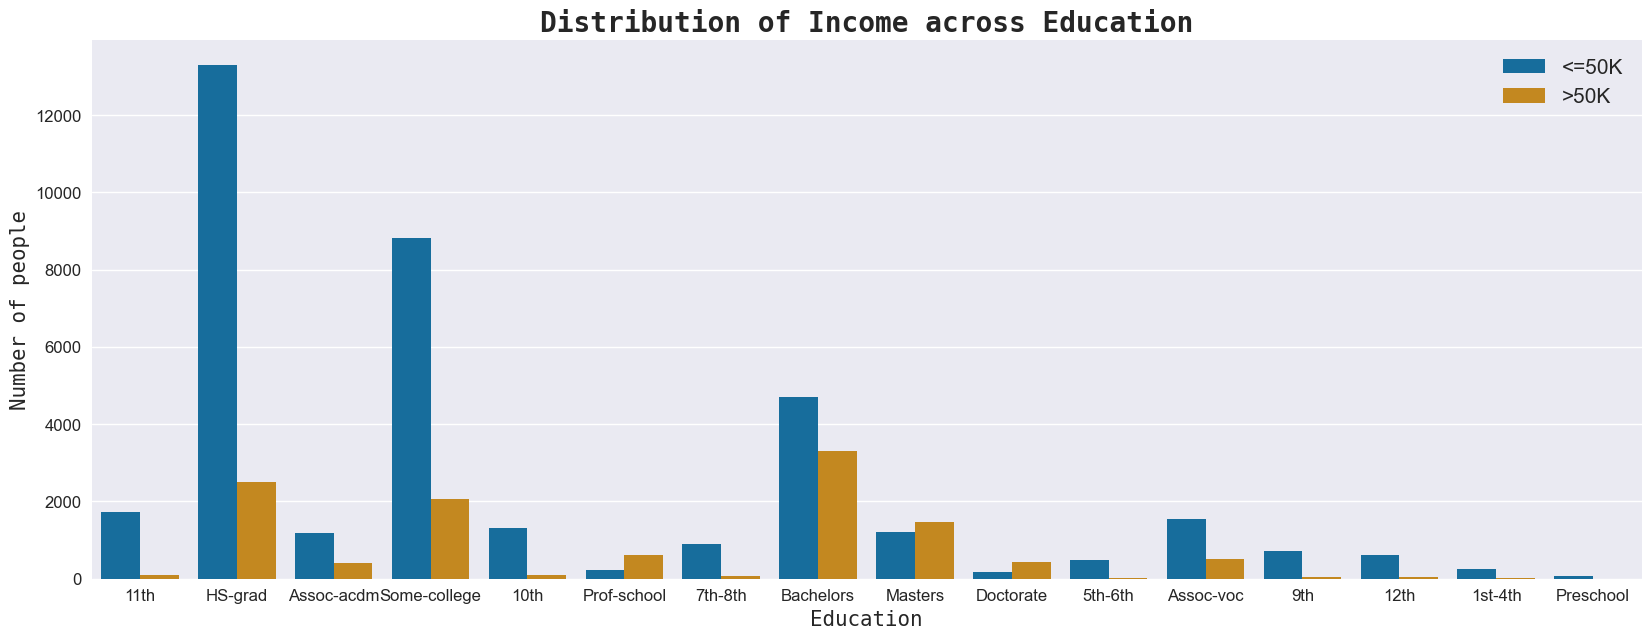

In [24]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['education'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

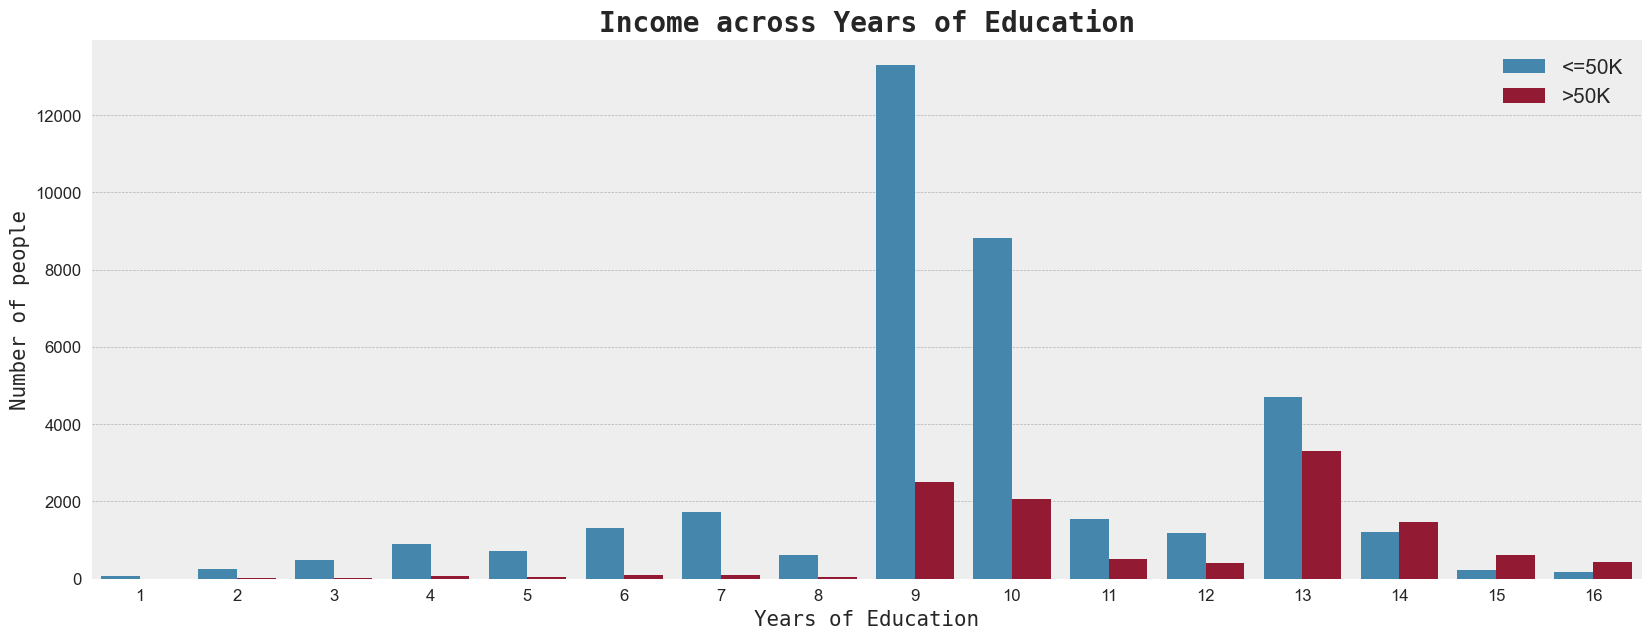

In [25]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['educational-num'],
              hue=df['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

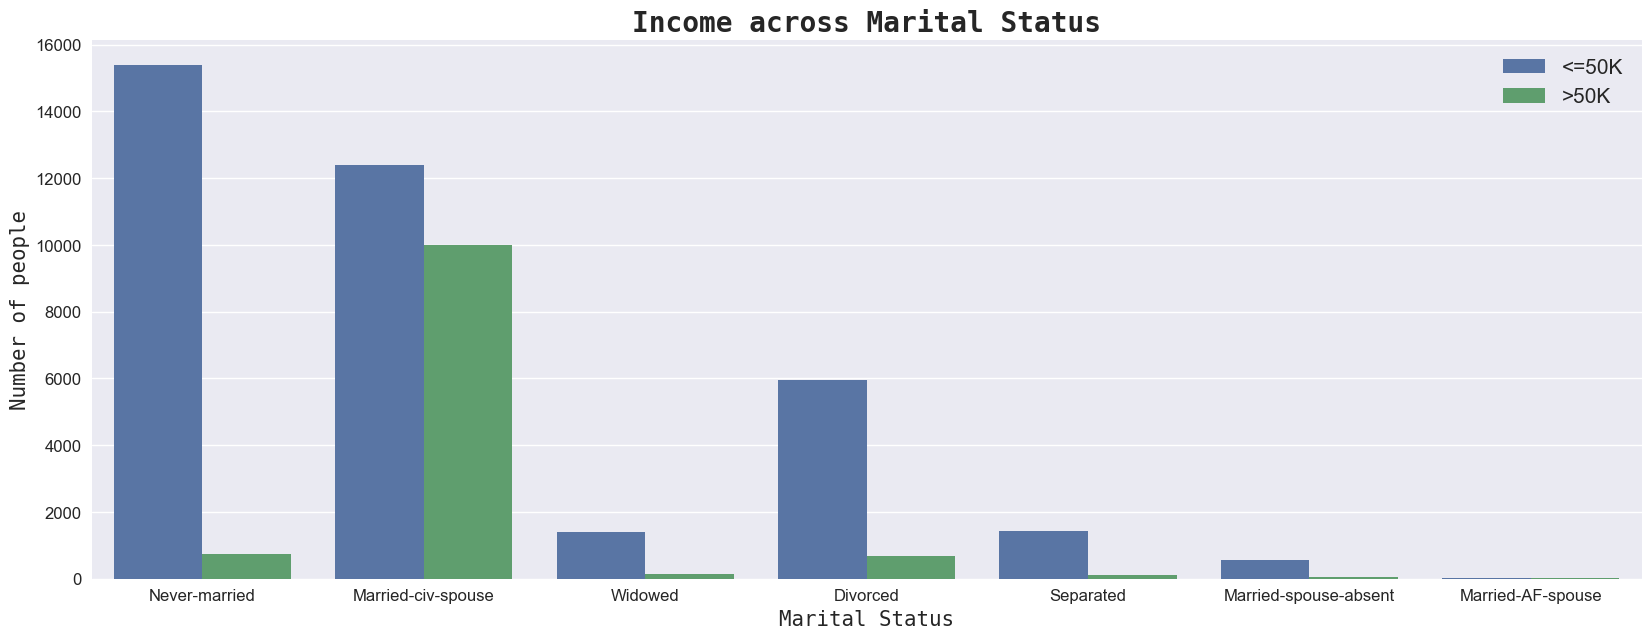

In [26]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['marital-status'], hue=df['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

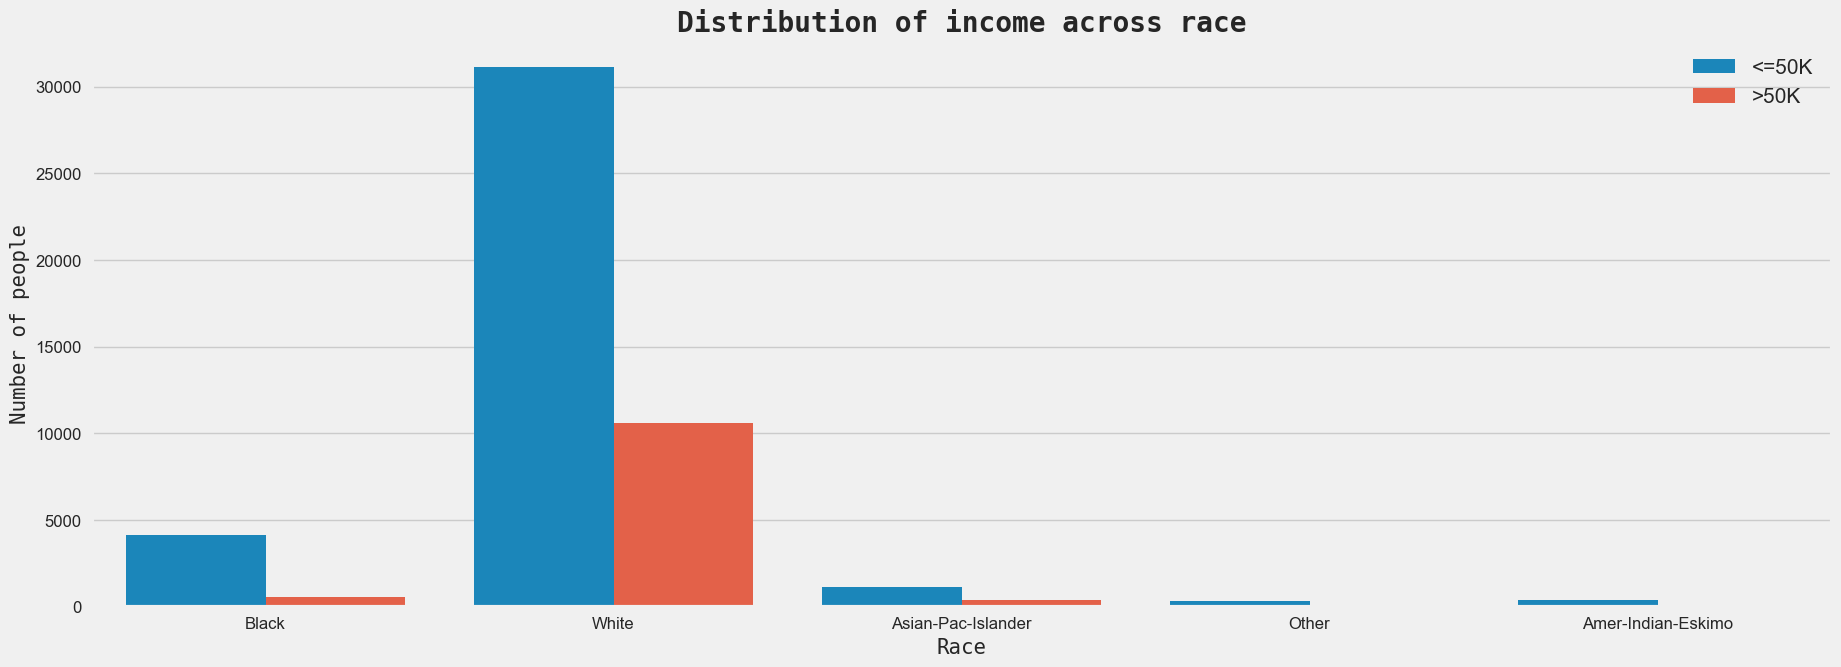

In [27]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['race'], hue=df['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

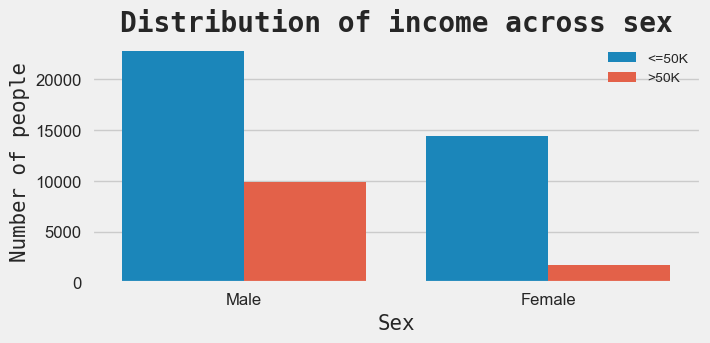

In [28]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df['gender'], hue=df['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

## 2.3: Multivariate Analysis

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
df['income'] = le.fit_transform(df['income'])

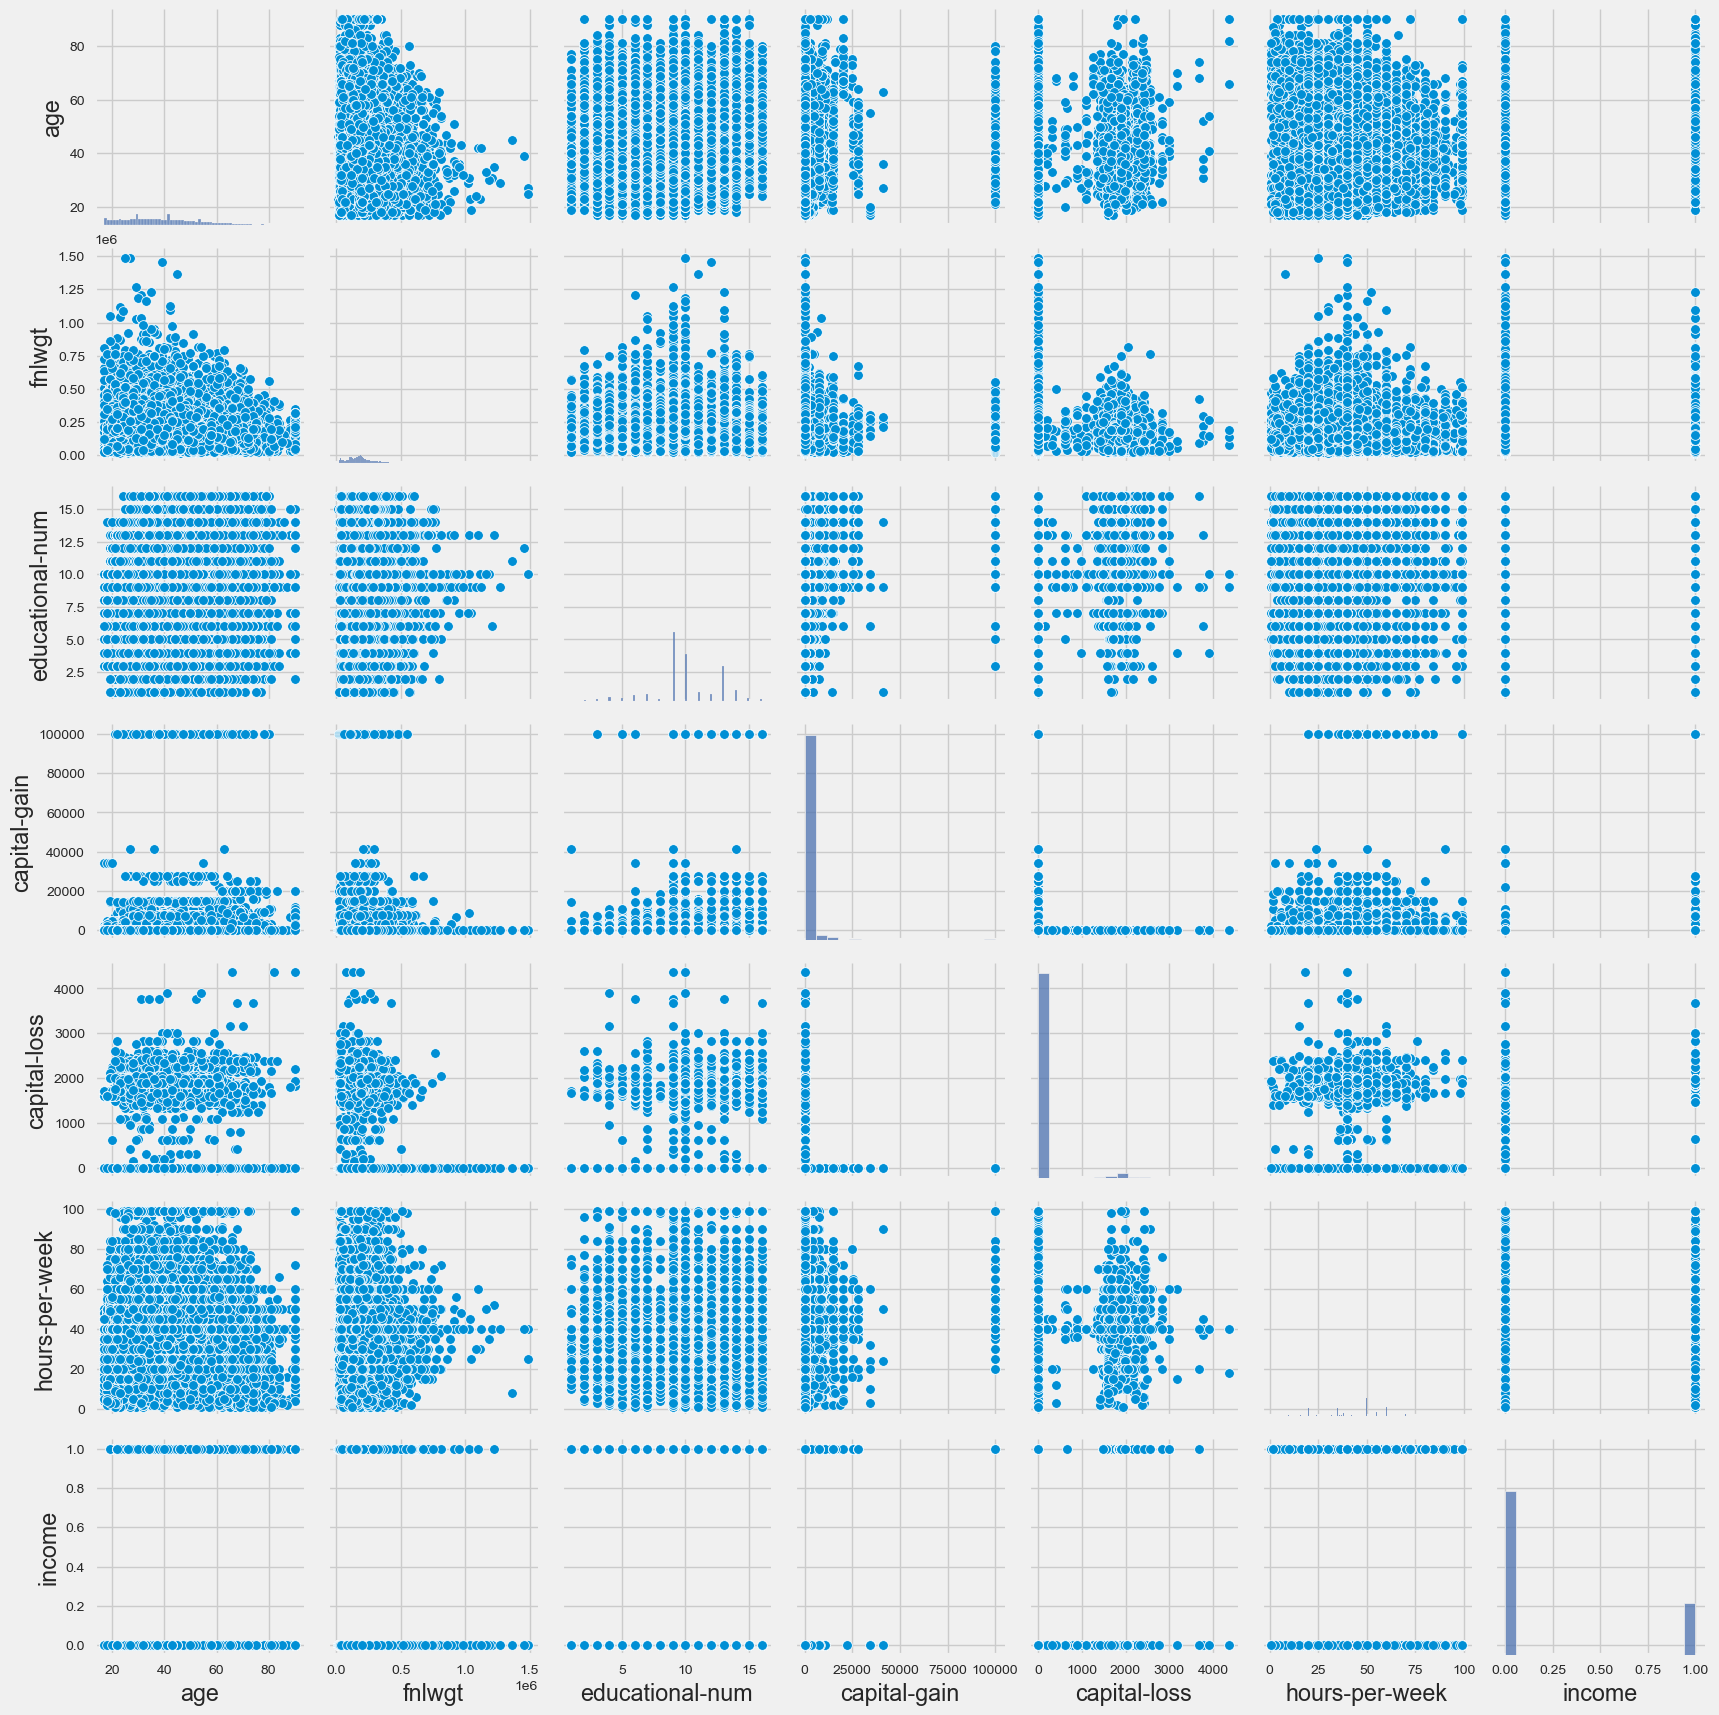

In [33]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

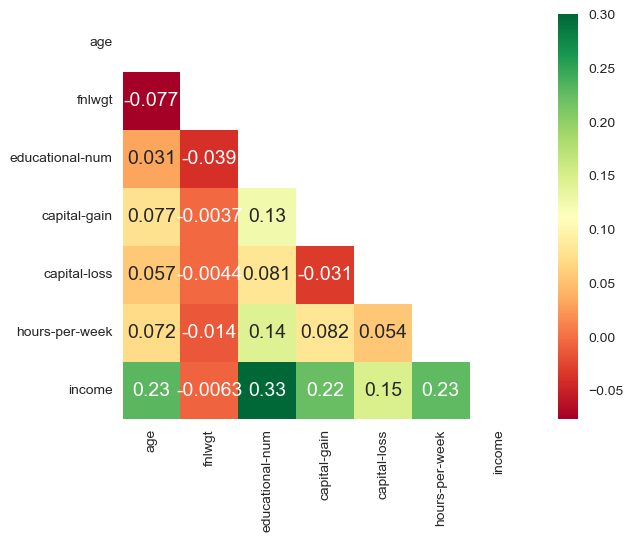

In [38]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

## Observations:
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

## Step 3: Data Preprocessing

## 3.1: Fixing '?' values in the dataset

In [39]:
df = df.replace('?', np.nan)

In [40]:
# Checking null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                 0.0 %
workclass          5.73 %
fnlwgt              0.0 %
education           0.0 %
educational-num     0.0 %
marital-status      0.0 %
occupation         5.75 %
relationship        0.0 %
race                0.0 %
gender              0.0 %
capital-gain        0.0 %
capital-loss        0.0 %
hours-per-week      0.0 %
native-country     1.75 %
income              0.0 %
dtype: object

In [41]:
columns_with_nan = ['workclass', 'occupation', 'native-country']

In [42]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

## 3.2: Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

## 3.3: Feature Selection

In [45]:
X = df.drop('income', axis=1)
Y = df['income']

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [47]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [48]:
feature_imp = selector.feature_importances_

In [49]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.75
1 3.88
2 17.64
3 3.78
4 8.34
5 7.27
6 7.05
7 9.01
8 1.41
9 2.96
10 8.9
11 2.89
12 9.58
13 1.54


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int32
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int32
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int32
 6   occupation       48842 non-null  int32
 7   relationship     48842 non-null  int32
 8   race             48842 non-null  int32
 9   gender           48842 non-null  int32
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 3.7 MB


In [51]:
X = X.drop(['workclass', 'education', 'race', 'gender',
            'capital-loss', 'native-country'], axis=1)

## 3.4: Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## 3.5: Fixing imbalanced dataset using Oversampling

In [54]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    76.07 %
1    23.93 %
Name: income, dtype: object

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [56]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [57]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [58]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

## 3.6: Creating a train test split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [60]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (59448, 8)
X_test shape: (14862, 8)
Y_train shape: (59448,)
Y_test shape: (14862,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [62]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [63]:
Y_pred_log_reg = log_reg.predict(X_test)

## 4.2: KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [66]:
Y_pred_knn = knn.predict(X_test)

## 4.3: Support Vector Classifier

In [67]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [68]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [69]:
Y_pred_svc = svc.predict(X_test)

## 4.4: Naive Bayes Classifier

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [71]:
nb.fit(X_train, Y_train)

GaussianNB()

In [72]:
Y_pred_nb = nb.predict(X_test)

## 4.5: Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [74]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [75]:
Y_pred_dec_tree = dec_tree.predict(X_test)

## 4.6: Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [77]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [78]:
Y_pred_ran_for = ran_for.predict(X_test)

## 4.7: XGB Classifier

In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [81]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [82]:
Y_pred_xgb = xgb.predict(X_test)

## Step 5: Model Evaluation

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [84]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.68
F1 score: 75.59


In [85]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.99
F1 score: 84.93


In [86]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 82.56
F1 score: 83.53


In [87]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 65.33
F1 score: 50.0


In [88]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.82
F1 score: 92.23


In [89]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 93.1
F1 score: 93.41


In [90]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.25
F1 score: 86.71


## Step 6: Hyperparameter Tuning

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [93]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [94]:
rf_tuned = RandomForestClassifier(random_state=42)

In [95]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [96]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [97]:
rf_cv.best_score_

0.9134706322238768

In [98]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [99]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [100]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [101]:
Y_pred_rf_best = rf_best.predict(X_test)

In [102]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.95
F1 score: 93.27


In [103]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

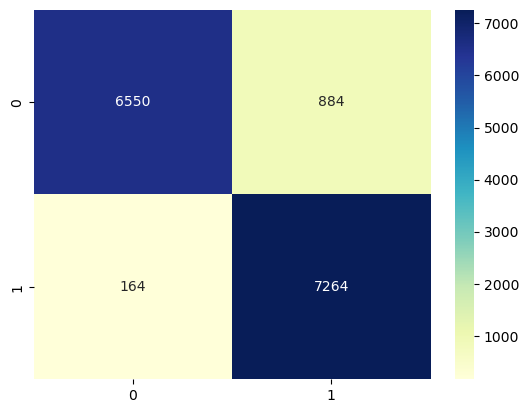

In [104]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [105]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      7434
           1       0.89      0.98      0.93      7428

    accuracy                           0.93     14862
   macro avg       0.93      0.93      0.93     14862
weighted avg       0.93      0.93      0.93     14862



In [117]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [118]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result,'% Acuuracy')

0.9158928811734626 % Acuuracy


## Conclusion:
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.

## Future work:
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.